## Capstone: Track 1 - Cyclistic Case Study

### Case Study Roadmap - Ask

Guiding questions

● What is the problem you are trying to solve?

● How can your insights drive business decisions?

Key tasks

1. Identify the business task
 Analyze the Cyclistic' s historical data in order to understand How do annual members and casual riders use Cyclistic bikes differently? This will help the marketing director to design better strategies aimed at converting casual riders into annual members.

2. Consider key stakeholders: The Marketing Director, Lily Moreno.

_Deliverable: A clear statement of the business task_

Analyze the Cyclistic' s historical data in order to understand How do annual members and casual riders use Cyclistic bikes differently? This will help the marketing director to design better strategies aimed at converting casual riders into annual members.


### Case Study Roadmap - Prepare

Guiding questions

● Where is your data located?

● How is the data organized?

● Are there issues with bias or credibility in this data? Does your data ROCCC?

● How are you addressing licensing, privacy, security, and accessibility?

● How did you verify the data's integrity?

● How does it help you answer your question?

● Are there any problems with the data?

Key tasks

1. Download data and store it appropriately.

2. Identify how it's organized.

3. Sort and filter the data.

4. Determine the credibility of the data.

_Deliverable: A description of all data sources used_

Data is located in a public shared repository ( [https://divvy-tripdata.s3.amazonaws.com/index.html](https://divvy-tripdata.s3.amazonaws.com/index.html) ) and organized in a monthly and quarterly .zip files containing .csv files with the data for corresponding period compressed.

In [2]:
#load libraries
import pandas as pd
import numpy as np
import os, zipfile
import glob

#decompress the files 
dir_name = 'C:\\Users\\AlexanderAntonioHida\\Downloads\\Capstone\\Cyclistic Historical trips'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

#Load and merge all files into 1 single data object 
#Data Paths
data_path = dir_name

# Read files
filenames = glob.glob(data_path + '\\2*.csv')

# Read files with latin1 character validation
list_of_dfs = []
for filename in filenames:
    df = pd.read_csv(filename, header=0, encoding='latin1', low_memory=False, sep=',', parse_dates=[0], infer_datetime_format=True, index_col=False)
    # drop columns without header names
    df.dropna(axis=1, how='all', inplace=True)
    # add filename as a new column
    df['filename'] = filename
    # append dataframe to the list
    list_of_dfs.append(df)

# concatenate all dataframes into one
combined_df = pd.concat(list_of_dfs, ignore_index=True)

# clean data columns from unicode and special characters and spaces
combined_df.columns = combined_df.columns.str.replace(r'[^a-zA-Z ]\s?', r'', regex=True)

# replace spaces in column names with underscores
combined_df.columns = combined_df.columns.str.replace(r" ", "_", regex=True)
combined_df = combined_df.rename(columns=lambda x: x.strip('*'))

combined_df.to_csv(data_path + '\\Merged_divvy-tripdata.csv', index=None, header=True)


In [17]:
#Transform the start/end date 
from datetime import datetime

# Convert the 'startedat' column to datetime objects
combined_df['startedat'] = pd.to_datetime(combined_df['startedat'], format="%Y-%m-%d %H:%M:%S")
combined_df['endedat'] = pd.to_datetime(combined_df['endedat'], format="%Y-%m-%d %H:%M:%S")

# Extract the month and year values and create a new column
combined_df['start_month_year'] = combined_df['startedat'].apply(lambda dt: f"{dt.year}-{dt.month:02}")
combined_df['end_month_year'] = combined_df['endedat'].apply(lambda dt: f"{dt.year}-{dt.month:02}")

# create value of time duration 
combined_df['time_diff_total'] = (combined_df['endedat'] - combined_df['startedat'])


#get day of the week 
combined_df['day_of_week'] = combined_df['startedat'].dt.strftime('%A')
#get hour of the day 
combined_df['hour_of_day'] = combined_df['startedat'].dt.hour

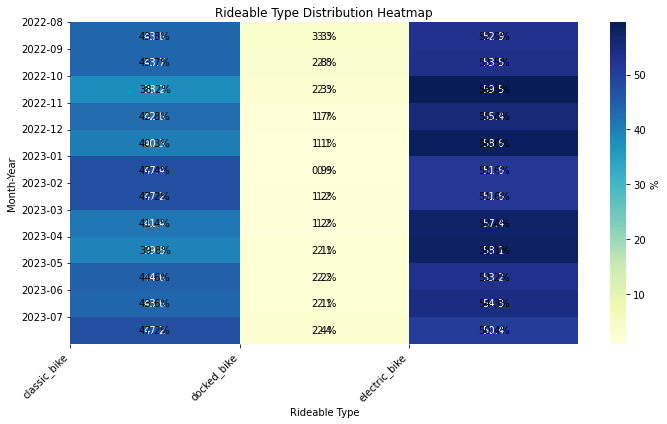

In [18]:
summary_table = combined_df.groupby(['start_month_year', 'rideabletype']).size().unstack(fill_value=0)

# Calculate row percentages
row_percentages = (summary_table.div(summary_table.sum(axis=1), axis=0) * 100).round(1)

# Format percentages as "10.0%"
formatted_percentages = row_percentages.applymap(lambda x: f"{x:.1f}%")

# make a graphical representation of the same distribution by month 
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(row_percentages, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '%'})

# Format percentages as "10.0%" and display on the heatmap
for i in range(len(summary_table.index)):
    for j in range(len(summary_table.columns)):
        plt.text(j + 0.5, i + 0.5, f"{row_percentages.iloc[i, j]:.1f}%", ha='center', va='center', color='black')

plt.title('Rideable Type Distribution Heatmap')
plt.xlabel('Rideable Type')
plt.ylabel('Month-Year')

# Adjusting the placement of tick marks and labels
plt.xticks(ticks=range(len(summary_table.columns)), labels=summary_table.columns, rotation=45, ha="right")
plt.yticks(ticks=range(len(summary_table.index)), labels=summary_table.index)

plt.tight_layout()
plt.show()

In [19]:
combined_df

,rideid,rideabletype,startedat,endedat,startstationname,startstationid,endstationname,endstationid,startlat,startlng,endlat,endlng,membercasual,filename,start_month_year,end_month_year,time_diff_total,day_of_week,hour_of_day
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.720000,casual,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2022-08,2022-08,0 days 00:07:31,Sunday,21
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.920000,-87.640000,casual,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2022-08,2022-08,0 days 00:14:02,Monday,14
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.970000,-87.660000,casual,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2022-08,2022-08,0 days 00:10:44,Monday,15
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.970000,-87.690000,casual,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2022-08,2022-08,0 days 00:15:03,Monday,2
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.840000,-87.660000,casual,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2022-08,2022-08,0 days 00:05:52,Sunday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723601,57F5743A5828DA62,electric_bike,2023-07-14 19:17:13,2023-07-14 19:26:31,NaN,NaN,California Ave & Division St,13256,41.91,-87.68,41.903029,-87.697474,member,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2023-07,2023-07,0 days 00:09:18,Friday,19
5723602,2FF218D4C8F0EF1C,electric_bike,2023-07-14 19:16:13,2023-07-14 19:16:16,NaN,NaN,NaN,NaN,41.91,-87.68,41.910000,-87.680000,member,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2023-07,2023-07,0 days 00:00:03,Friday,19
5723603,2661FBD1F5A1C76D,electric_bike,2023-07-15 13:34:00,2023-07-15 13:43:13,NaN,NaN,NaN,NaN,41.94,-87.65,41.930000,-87.640000,member,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2023-07,2023-07,0 days 00:09:13,Saturday,13
5723604,9CF4B70C23E033B1,electric_bike,2023-07-06 20:52:09,2023-07-06 21:01:13,NaN,NaN,NaN,NaN,41.91,-87.63,41.930000,-87.640000,member,C:\Users\AlexanderAntonioHida\Downloads\Capsto...,2023-07,2023-07,0 days 00:09:04,Thursday,20


In [20]:
#remove Missing values from station columns 
combined_clean_df = combined_df.dropna(subset=['endstationname'])
combined_clean_df = combined_df.dropna(subset=['startstationname'])

analysis_columns = ['rideid','membercasual','rideabletype','startstationname','endstationname','start_month_year','time_diff_total','day_of_week','hour_of_day']
combined_clean_df = combined_clean_df[analysis_columns]


combined_clean_df.to_csv(data_path + '\\Merged_clean_divvy-tripdata.csv', index=None, header=True)


KeyboardInterrupt: 

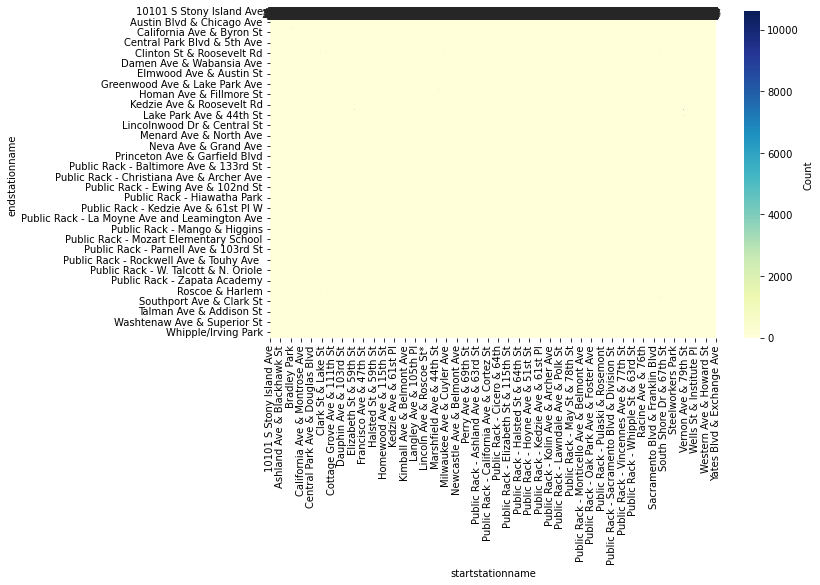

In [21]:
# Create a cross-tabulation of station names
station_cross_tab = pd.crosstab(combined_clean_df['endstationname'], combined_clean_df['startstationname'])

# Create heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(station_cross_tab, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})

plt.title('Station Interaction Heatmap')
plt.xlabel('Start Station')
plt.ylabel('End Station')

plt.tight_layout()
plt.show()